In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit import RDLogger
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)
from rdkit.Chem import rdMolDescriptors as rdescriptors
import seaborn as sns
from rdkit.Chem import Descriptors

In [2]:
db = [mol for mol in Chem.SDMolSupplier("/Users/emafialova/cdd2025/data/drugbank.sdf") if mol]

In [3]:
m = Chem.MolFromSmiles("c1ccccc1CCCCCc1ccccc1")

In [4]:
p = Chem.MolFromSmarts("c1ccccc1")

In [6]:
m.GetSubstructMatches(p)

((0, 1, 2, 3, 4, 5), (11, 12, 13, 14, 15, 16))

In [10]:
sum([int(m.HasSubstructMatch(p)) for m in db])

4288

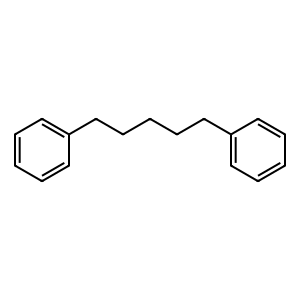

In [ ]:
from rdkit.Chem import Draw
Draw.MolToImage(m)

In [11]:
all_m = [mol for mol in db if m.HasSubstructMatch(p)]

In [15]:
asp_p = Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(=O)O")
all_asp = [mol for mol in db if mol.HasSubstructMatch(asp_p)]

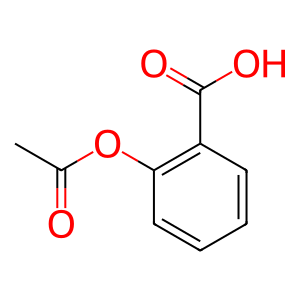

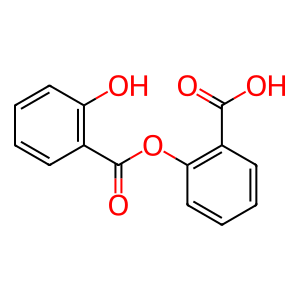

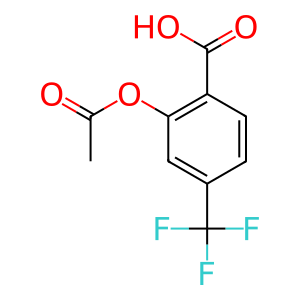

In [18]:
for i in all_asp[:3]:
    display(Draw.MolToImage(i))

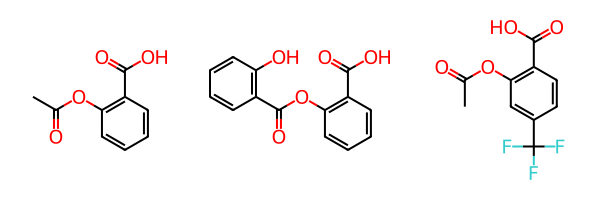

In [19]:
Draw.MolsToGridImage(all_asp[:3])

PAINS

In [ ]:
pains = {}
with open("/Users/emafialova/cdd2025/data/pains/p_l15.txt") as soubor:
    lines = soubor.readlines()
    for line in lines:
        key = line.strip().split("\t")[1]
        values = line.strip().split("\t")[0]
        vals = Chem.MolFromSmarts(values)
        pains[key] = vals
print(pains)

{'<regId="anil_di_alk_F(14)">': <rdkit.Chem.rdchem.Mol object at 0x15e72eea0>, '<regId="hzone_anil(14)">': <rdkit.Chem.rdchem.Mol object at 0x15e72ee30>, '<regId="het_5_pyrazole_OH(14)">': <rdkit.Chem.rdchem.Mol object at 0x15e72edc0>, '<regId="het_thio_666_A(13)">': <rdkit.Chem.rdchem.Mol object at 0x15e72ed50>, '<regId="styrene_A(13)">': <rdkit.Chem.rdchem.Mol object at 0x15e72ec70>, '<regId="ene_rhod_C(13)">': <rdkit.Chem.rdchem.Mol object at 0x15e72ece0>, '<regId="dhp_amino_CN_A(13)">': <rdkit.Chem.rdchem.Mol object at 0x15e72ec00>, '<regId="cyano_imine_C(12)">': <rdkit.Chem.rdchem.Mol object at 0x15e72eb90>, '<regId="thio_urea_A(12)">': <rdkit.Chem.rdchem.Mol object at 0x15e72eb20>, '<regId="thiophene_amino_B(12)">': <rdkit.Chem.rdchem.Mol object at 0x15e72eab0>, '<regId="keto_keto_beta_B(12)">': <rdkit.Chem.rdchem.Mol object at 0x15e72ea40>, '<regId="keto_phenone_A(11)">': <rdkit.Chem.rdchem.Mol object at 0x15e72e960>, '<regId="cyano_pyridone_C(11)">': <rdkit.Chem.rdchem.Mol obje

In [45]:
from collections import defaultdict
patterns = set()
# Create a defaultdict with a default
# value of an empty list
db_pains = defaultdict(list)
for i in db:
    for j in pains.values():
        if i.HasSubstructMatch(j):
            db_pains[i].append(j)
            patterns.add(j)
print(len(db_pains))

16


In [46]:
print(len(db_pains))
print(len(patterns))

16
7


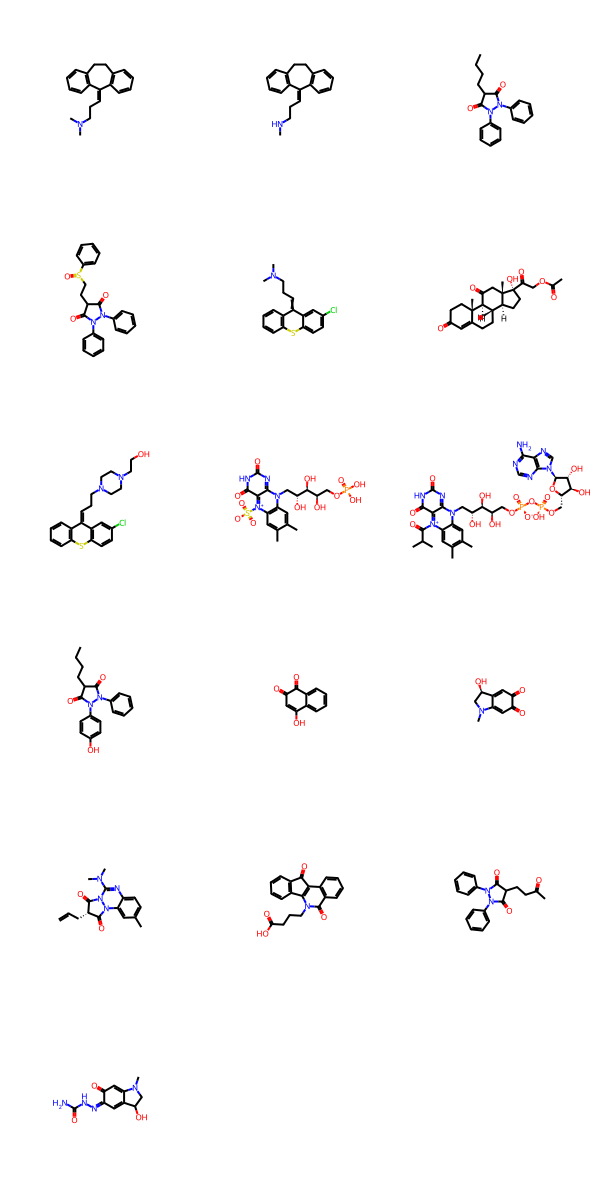

In [44]:
Draw.MolsToGridImage(db_pains.keys())

In [47]:
df = pd.read_csv("/Users/emafialova/cdd2025/data/chembl_mtor_ic50.csv", sep=";")
df_smiles = df["Smiles"]
df_smiles_list = list(Chem.MolFromSmiles(smiles) for smiles in df_smiles)

In [50]:
print(df_smiles_list)

[<rdkit.Chem.rdchem.Mol object at 0x15ec5d850>, <rdkit.Chem.rdchem.Mol object at 0x15ec5d8c0>, <rdkit.Chem.rdchem.Mol object at 0x15ec5d930>, <rdkit.Chem.rdchem.Mol object at 0x15ec5d9a0>, <rdkit.Chem.rdchem.Mol object at 0x15ec5da10>, <rdkit.Chem.rdchem.Mol object at 0x15ec5da80>, <rdkit.Chem.rdchem.Mol object at 0x15ec5daf0>, <rdkit.Chem.rdchem.Mol object at 0x15ec5db60>, <rdkit.Chem.rdchem.Mol object at 0x15ec5dbd0>, <rdkit.Chem.rdchem.Mol object at 0x15ec5dc40>, <rdkit.Chem.rdchem.Mol object at 0x15ec5dcb0>, <rdkit.Chem.rdchem.Mol object at 0x15ec5dd20>, <rdkit.Chem.rdchem.Mol object at 0x15ec5dd90>, <rdkit.Chem.rdchem.Mol object at 0x15ec5de00>, <rdkit.Chem.rdchem.Mol object at 0x15ec5de70>, <rdkit.Chem.rdchem.Mol object at 0x15ec5dee0>, <rdkit.Chem.rdchem.Mol object at 0x15ec5df50>, <rdkit.Chem.rdchem.Mol object at 0x15ec5dfc0>, <rdkit.Chem.rdchem.Mol object at 0x15ec5e030>, <rdkit.Chem.rdchem.Mol object at 0x15ec5e0a0>, <rdkit.Chem.rdchem.Mol object at 0x15ec5e110>, <rdkit.Chem.

In [48]:
patterns2 = set()
# Create a defaultdict with a default
# value of an empty list
db_pains2 = defaultdict(list)
for i in df_smiles_list:
    for j in pains.values():
        if i.HasSubstructMatch(j):
            db_pains2[i].append(j)
            patterns2.add(j)
print(len(db_pains2))

0


In [49]:
print(len(patterns2))

0
